## Decision trees

1. pros: computational cheap to use, easy for humans to understand, missing values ok, can deal with irrelevant features
2. cons: prone to overfitting
3. works with: Numeric values, nominal values
4. how to split a dataset will use something mathematic theory: ***information theory***
5. some decision trees make a binary split of the data, but if we split on an attribute and it has 4 possible values, then we'll split the data 4 ways and create 4 separate branches.
6. we'll follow the ***ID3 algorithm*** to tell us how to split the data and when to stop splitting.
7. the change in information before and after the split is known as the ***information gain***, when you know how the calculate the information gain, you can split your data across every feature to see which split gives you the highest information gain. the split with the highest information gain is your best option. before you can measure the best split and start splitting our data, you need to know how to calculate the information gain, the measure of information of a set is known as the ***shannon entropy***, or just ***entropy*** for short.
8. ***entropy*** is defined as the expected value of the information, and we need first to define information. if we're classifying something that can take on multiple values, the information for symbol $x_i^{}$ is defined as : $l(x_i^{}) = log_2^{} P(x_i^{})$ , where $P(x_i^{})$ is the probability of choosing this class. to calculate entropy, you need the expected value of all the information of all possible values of our class, this is given by: $$ H = - \sum_{i=1}^{n} P(x_i^{}) * log_2^{} P(x_i^{}) $$ , where n is the number of class. and the higher the entropy, the more mixed up the data is. So entropy is kind of a thing to measure the amount of disorder in a dataset. for decision tree, we need to measure the entropy, split the dataset, measure the entropy on the split sets, and see if splitting it was the right thing to do. and we'll do this for all our features to determine the best feature to split on.
9. summary


```
A decision tree classifier is just like a work-flow diagram with the terminating blocks representing classification decisions. Start with a dataset, you can measure the inconsistency of a set or the entropy to find a way to split the set until all the data belongs to the same class. The ID3 algorithm can split nominal-valued datasets. recursion is used in tree-building algorithms to turn a dataset into a decision tree. And there are other decision tree-generating algorithms. the most popular are C4.5 and CART, CART will be addressed later when we talk aboug regression.
```


$$H = - \sum_{i=1}^{n} P(x_i^{}) * log_2^{} P(x_i^{})$$

In [1]:
import operator
from math import log

## sample test

In [46]:
def createDataSet():
    """DateSet 基础数据集

    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

dataSet, labels = createDataSet()
print dataSet
print labels

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


In [9]:
def calcShannonEnt(dataSet):
    """calcShannonEnt(calculate Shannon entropy 计算给定数据集的香农熵)

    Args:
        dataSet 数据集
    Returns:
        返回 每一组feature下的某个分类下，香农熵的信息期望
    """
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)

    # 计算分类标签label出现的次数
    labelCounts = {}
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)

    return shannonEnt

In [10]:
shannonEnt = calcShannonEnt(dataSet)
print shannonEnt

0.970950594455


In [17]:
def splitDataSet(dataSet, index, value):
    """对 dataset 进行分类，选取第 index 个feature
    """
    retDataSet = []
    for featVec in dataSet: 
#         print featVec, index
        if featVec[index] == value:
            reducedFeatVec = featVec[: index]
            reducedFeatVec.extend(featVec[index+1 : ])
            retDataSet.append(reducedFeatVec)

    return retDataSet

In [18]:
print splitDataSet(dataSet, 0, 1)
print splitDataSet(dataSet, 0, 0)

[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [35]:
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    ### 计算feature 数量和原始数据集的信息熵
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    
    ### 查找根据信息增益原则，找到最合适的分类特征
    bestInfoGain, bestFeature = 0.0, -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)

        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print 'currentFeature: {}, baseEntropy: {}, newEntropy: {}, infoGain: {}'.format(i, round(baseEntropy, 2), round(newEntropy, 2), round(infoGain, 2))

        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    
    print 'bestFeature: {}, bestInfoGain: {}'.format(bestFeature, round(bestInfoGain, 2))
    
    return bestFeature

In [36]:
chooseBestFeatureToSplit(dataSet)

currentFeature: 0, baseEntropy: 0.97, newEntropy: 0.55, infoGain: 0.42
currentFeature: 1, baseEntropy: 0.97, newEntropy: 0.8, infoGain: 0.17
bestFeature: 0, bestInfoGain: 0.42


0

In [37]:
def majorityCnt(classList):
    """majorityCnt(选择出现次数最多的一个结果)

    Args:
        classList label列的集合
    Returns:
        bestFeature 最优的特征列
    """
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0]

In [47]:
def createTree(dataSet, labels):
    dataSet = copy.deepcopy(dataSet)
    labels = copy.deepcopy(labels)
    
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}
    
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    
    return myTree

In [52]:
tree = createTree(dataSet, labels)
print tree

currentFeature: 0, baseEntropy: 0.97, newEntropy: 0.55, infoGain: 0.42
currentFeature: 1, baseEntropy: 0.97, newEntropy: 0.8, infoGain: 0.17
bestFeature: 0, bestInfoGain: 0.42
currentFeature: 0, baseEntropy: 0.92, newEntropy: 0.0, infoGain: 0.92
bestFeature: 0, bestInfoGain: 0.92
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [12]:
def classify(inputTree, featLabels, testVec):
    """classify(给输入的节点，进行分类)

    Args:
        inputTree  决策树模型
        featLabels Feature标签对应的名称
        testVec    测试输入的数据
    Returns:
        classLabel 分类的结果值，需要映射label才能知道名称
    """
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print '+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat

    return classLabel

In [63]:
def ContactLensesTest():
    """
    Desc:
        预测隐形眼镜的测试代码
    Args:
        none
    Returns:
        none
    """
    fr = open('../../../input/3.DecisionTree/lenses.txt')
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    
    print '-' * 80
    data = [lensesLabels] + lenses
    print pd.DataFrame.from_records(data)
    print '-' * 80
    
    lensesTree = createTree(lenses, lensesLabels)
    print lensesTree
    import decisionTreePlot as dtPlot
    dtPlot.createPlot(lensesTree)

--------------------------------------------------------------------------------
             0          1           2         3          4
0          age  prescript  astigmatic  tearRate       None
1        young      myope          no   reduced  no lenses
2        young      myope          no    normal       soft
3        young      myope         yes   reduced  no lenses
4        young      myope         yes    normal       hard
5        young      hyper          no   reduced  no lenses
6        young      hyper          no    normal       soft
7        young      hyper         yes   reduced  no lenses
8        young      hyper         yes    normal       hard
9          pre      myope          no   reduced  no lenses
10         pre      myope          no    normal       soft
11         pre      myope         yes   reduced  no lenses
12         pre      myope         yes    normal       hard
13         pre      hyper          no   reduced  no lenses
14         pre      hyper         

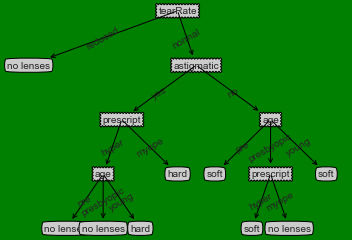

In [64]:
ContactLensesTest()

## 例子：sklearn decision tree

In [69]:
def createDataSet():
    ''' 数据读入 '''
    data = []
    labels = []
    with open("../../../input/3.DecisionTree/data.txt") as ifile:
        for line in ifile:
            # 特征： 身高 体重   label： 胖瘦
            tokens = line.strip().split(' ')
            data.append([float(tk) for tk in tokens[:-1]])
            labels.append(tokens[-1])
    # 特征数据
    x = np.array(data)
    # label分类的标签数据
    labels = np.array(labels)
    # 预估结果的标签数据
    y = np.zeros(labels.shape)

    ''' 标签转换为0/1 '''
    y[labels == 'fat'] = 1
    print x
    print y
    print labels
    return x, y

In [70]:
x, y = createDataSet()

[[  1.5  50. ]
 [  1.5  60. ]
 [  1.6  40. ]
 [  1.6  60. ]
 [  1.7  60. ]
 [  1.7  80. ]
 [  1.8  60. ]
 [  1.8  90. ]
 [  1.9  70. ]
 [  1.9  80. ]]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
['thin' 'fat' 'thin' 'fat' 'thin' 'fat' 'thin' 'fat' 'thin' 'thin']


In [119]:
def predict_train(x_train, y_train):
    '''
    使用信息熵作为划分标准，对决策树进行训练
    参考链接： http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
    '''
    import sklearn
    clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    # print(clf)
    clf.fit(x_train, y_train)
    ''' 系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大 '''
    print 'feature_importances_: %s' % clf.feature_importances_

    '''测试结果的打印'''
    y_pre = clf.predict(x_train)
    # print(x_train)
    print(y_pre)
    print(y_train)
    print(np.mean(y_pre == y_train))
    
    return y_pre, clf

In [122]:
print sklearn.tree.DecisionTreeClassifier.__doc__

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : string, optional (default="gini")
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : string, optional (default="best")
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int or None, optional (default=None)
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int, float, optional (default=2)
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If floa

In [82]:
y_pre, clf = predict_train(x, y)

feature_importances_: [ 0.54020385  0.45979615]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
1.0


In [87]:
def show_precision_recall(x, y, clf,  y_train, y_pre):
    '''
    准确率与召回率
    参考链接： http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve
    '''
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_train, y_pre)
    # 计算全量的预估结果
    answer = clf.predict_proba(x)[:, 1]

    '''
    展现 准确率与召回率
        precision 准确率
        recall 召回率
        f1-score  准确率和召回率的一个综合得分
        support 参与比较的数量
    参考链接：http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
    '''
    # target_names 以 y的label分类为准
    target_names = ['thin', 'fat']
    print(sklearn.metrics.classification_report(y, answer, target_names=target_names))
    print(answer)
    print(y)

In [89]:
show_precision_recall(x, y, clf, y, y_pre)

             precision    recall  f1-score   support

       thin       1.00      1.00      1.00         6
        fat       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        10

[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]


In [126]:
def show_pdf(clf):
    '''
    可视化输出
    把决策树结构写入文件: http://sklearn.lzjqsdd.com/modules/tree.html

    Mac报错：pydotplus.graphviz.InvocationException: GraphViz's executables not found
    解决方案：sudo brew install graphviz
    参考写入： http://www.jianshu.com/p/59b510bafb4d
    '''
    # with open("testResult/tree.dot", 'w') as f:
    #     from sklearn.externals.six import StringIO
    #     tree.export_graphviz(clf, out_file=f)

    import pydotplus
    from sklearn.externals.six import StringIO
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, rounded=True, filled=True,)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return graph

In [127]:
graph = show_pdf(clf)

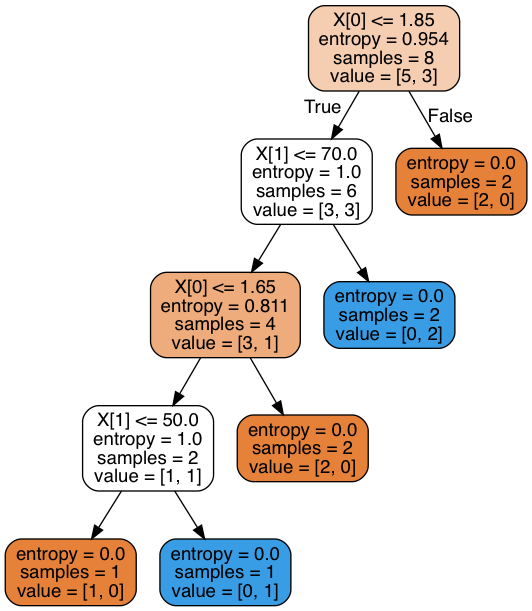

In [128]:
from IPython.display import Image
Image(graph.create_png())

In [129]:
from sklearn.cross_validation import train_test_split

In [130]:
sklearn.cross_validation.train_test_split

<function sklearn.cross_validation.train_test_split>

[[  1.5  50. ]
 [  1.5  60. ]
 [  1.6  40. ]
 [  1.6  60. ]
 [  1.7  60. ]
 [  1.7  80. ]
 [  1.8  60. ]
 [  1.8  90. ]
 [  1.9  70. ]
 [  1.9  80. ]]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
['thin' 'fat' 'thin' 'fat' 'thin' 'fat' 'thin' 'fat' 'thin' 'thin']
拆分训练数据与测试数据， 80%做训练 20%做测试 
拆分数据：
x_train: 
[[  1.6  60. ]
 [  1.8  60. ]
 [  1.9  80. ]
 [  1.8  90. ]
 [  1.7  60. ]
 [  1.6  40. ]
 [  1.7  80. ]
 [  1.9  70. ]]
x_test: 
[[  1.5  50. ]
 [  1.5  60. ]]
y_train: 
[ 1.  0.  0.  1.  0.  0.  1.  0.]
y_test: 
[ 0.  1.]
feature_importances_: [ 0.37726345  0.62273655]
[ 1.  0.  0.  1.  0.  0.  1.  0.]
[ 1.  0.  0.  1.  0.  0.  1.  0.]
1.0
             precision    recall  f1-score   support

       thin       1.00      1.00      1.00         6
        fat       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        10

[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]
[ 0.  1.  0.  1.  0.  1.  0.  1.  0.  0.]


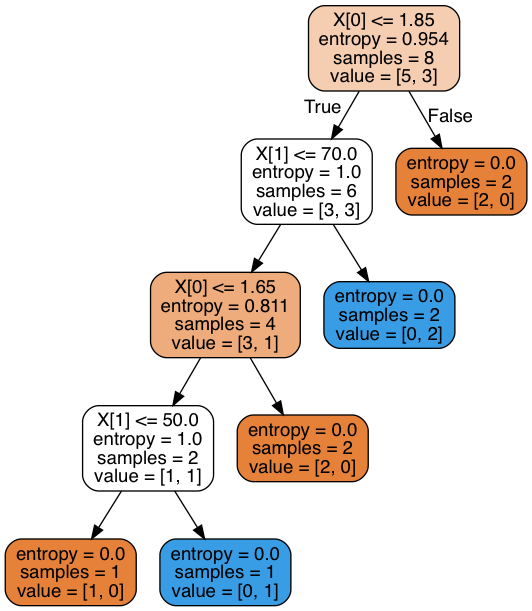

In [131]:
x, y = createDataSet()

print '''拆分训练数据与测试数据， 80%做训练 20%做测试 '''
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, test_size=0.2)
print '拆分数据：'
print 'x_train: '
print x_train

print 'x_test: '
print x_test

print 'y_train: '
print y_train

print 'y_test: '
print y_test


# 得到训练的预测结果集
y_pre, clf = predict_train(x_train, y_train)

# 展现 准确率与召回率
show_precision_recall(x, y, clf, y_train, y_pre)

# 可视化输出
graph = show_pdf(clf)
from IPython.display import Image
Image(graph.create_png())

## 例子: sklearn irir example

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()
clf = sklearn.tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [144]:
dot_data = sklearn.tree.export_graphviz(clf, out_file=None)
print dot_data

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

In [145]:
import graphviz
graph = graphviz.Source(dot_data)

In [146]:
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True,
                                        special_characters=True)
print dot_data

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa>, fillcolor="#e5813900"] ;
1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>class = setosa>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor>, fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor>, fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]<br/>class = versicolor>, fillcolor="#39e581fa"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 47<br/>value = 

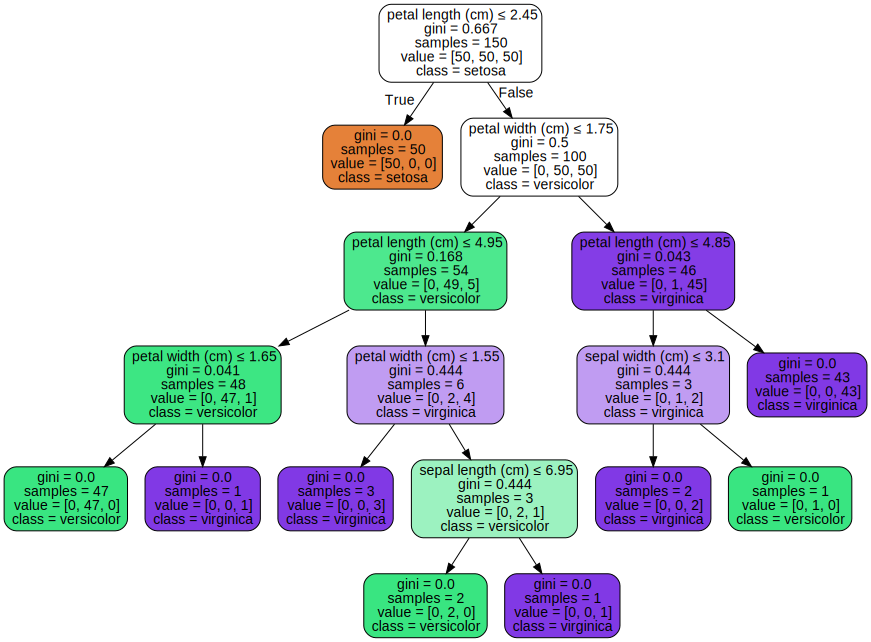

In [148]:
import graphviz
graph = graphviz.Source(dot_data)
graph

## 参考资料

- [为什么信息熵要定义成-Σp*log(p)](https://www.zhihu.com/question/30828247)
- [香农信息熵 （Shannon's Entropy)在生命科学中的应用](http://blog.sciencenet.cn/blog-986653-707058.html)
- [决策树－非线性分类与回归](http://imyin.xyz/2016/09/28/Nonlinear%20Classification%20and%20Regression%20with%20Decision%20Trees/)
- [决策树](https://zh.wikipedia.org/wiki/%E5%86%B3%E7%AD%96%E6%A0%91)
- [机器学习算法实践-决策树(Decision Tree)](https://zhuanlan.zhihu.com/p/27905967)
- [分类算法：决策树（C4.5）](http://shiyanjun.cn/archives/428.html)
- [统计学习方法笔记(五) —— 决策树](http://izhaoyi.top/2017/06/19/Decision-Tree/)
- []()
- []()
- []()